In [16]:
import numpy as np
from PIL import Image
import os
import hashlib
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time

def file_hash(filepath):
    with open(filepath, "rb") as f:
        return md5(f.read()).hexdigest()

filepath = r"C:\Users\martin.szigeti\Documents\UN Work\NCE\UNICEF_Imagery_Uganda"

In [22]:
file_list = os.listdir(filepath)
print(len(file_list))

1078


In [33]:
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir(filepath)):
    if os.path.isfile(filepath+'/'+filename):
        with open(filepath+'/'+filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

(147, 145)
159.png


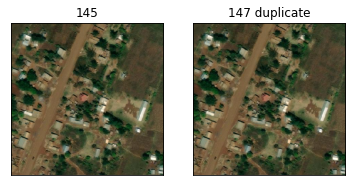

(151, 150)
163.png


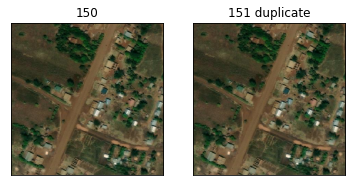

(153, 152)
165.png


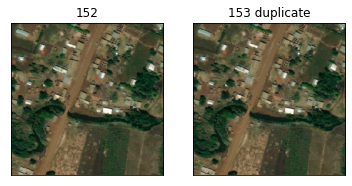

(154, 152)
165.png


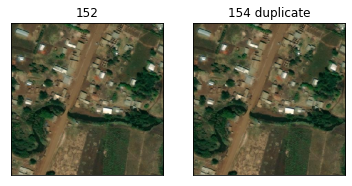

(175, 174)
185.png


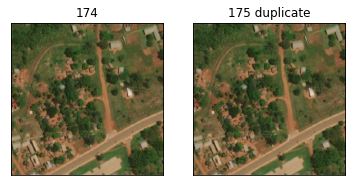

In [34]:
for file_indexes in duplicates[:5]:
    try:
        print(file_indexes)
        print(file_list[file_indexes[1]])
        plt.subplot(121),plt.imshow(imageio.imread(filepath+'/'+file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imageio.imread(filepath+'/'+file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [36]:
for index in duplicates:
    os.remove(filepath+'/'+file_list[index[0]])